In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv(r"C:\Users\Krutika\Desktop\iot (1).CSV")
df

,Machine_ID,Machine_Type,Installation_Year,Operational_Hours,Temperature_C,Vibration_mms,Sound_dB,Oil_Level_pct,Coolant_Level_pct,Power_Consumption_kW,Last_Maintenance_Days_Ago,Maintenance_History_Count,Failure_History_Count,AI_Supervision,Error_Codes_Last_30_Days,Remaining_Useful_Life_days,Failure_Within_7_Days
0,MC_000000,Mixer,2027,81769,73.43,12.78,83.72,36.76,68.74,84.95,153,4,5,True,3,162,False
1,MC_000001,Industrial_Chiller,2032,74966,58.32,14.99,77.04,100.00,62.13,154.61,136,5,2,True,4,147,False
2,MC_000002,Pick_and_Place,2003,94006,49.63,23.78,69.08,42.96,35.96,51.90,258,1,1,True,6,0,True
3,MC_000003,Vision_System,2007,76637,63.73,12.38,85.58,94.90,48.94,75.61,43,4,1,False,4,161,False
4,MC_000004,Shuttle_System,2016,20870,42.77,4.42,96.72,47.56,53.78,224.93,346,4,2,False,1,765,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3479,MC_003479,CMM,2015,75745,56.65,7.87,89.18,75.09,68.08,185.97,20,4,3,False,0,291,False
3480,MC_003480,Grinder,2038,35737,62.10,6.95,62.16,51.49,93.97,220.73,354,4,1,False,1,560,False
3481,MC_003481,Boiler,2010,11028,78.30,14.72,65.52,77.06,65.49,151.77,98,10,2,True,3,912,False
3482,MC_003482,Shrink_Wrapper,2028,75002,73.50,2.37,90.58,61.51,100.00,105.04,37,7,2,False,3,265,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3484 entries, 0 to 3483
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Machine_ID                  3484 non-null   object 
 1   Machine_Type                3484 non-null   object 
 2   Installation_Year           3484 non-null   int64  
 3   Operational_Hours           3484 non-null   int64  
 4   Temperature_C               3484 non-null   float64
 5   Vibration_mms               3484 non-null   float64
 6   Sound_dB                    3484 non-null   float64
 7   Oil_Level_pct               3484 non-null   float64
 8   Coolant_Level_pct           3484 non-null   float64
 9   Power_Consumption_kW        3484 non-null   float64
 10  Last_Maintenance_Days_Ago   3484 non-null   int64  
 11  Maintenance_History_Count   3484 non-null   int64  
 12  Failure_History_Count       3484 non-null   int64  
 13  AI_Supervision              3484 

In [4]:
df.isnull().sum()

Machine_ID                    0
Machine_Type                  0
Installation_Year             0
Operational_Hours             0
Temperature_C                 0
Vibration_mms                 0
Sound_dB                      0
Oil_Level_pct                 0
Coolant_Level_pct             0
Power_Consumption_kW          0
Last_Maintenance_Days_Ago     0
Maintenance_History_Count     0
Failure_History_Count         0
AI_Supervision                0
Error_Codes_Last_30_Days      0
Remaining_Useful_Life_days    0
Failure_Within_7_Days         0
dtype: int64

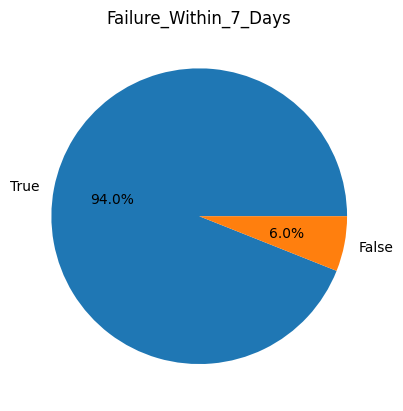

In [5]:
labels=['True','False']
size=df['Failure_Within_7_Days'].value_counts()
plt.pie(size,labels=labels,autopct='%1.1f%%')
plt.title('Failure_Within_7_Days')
plt.show()

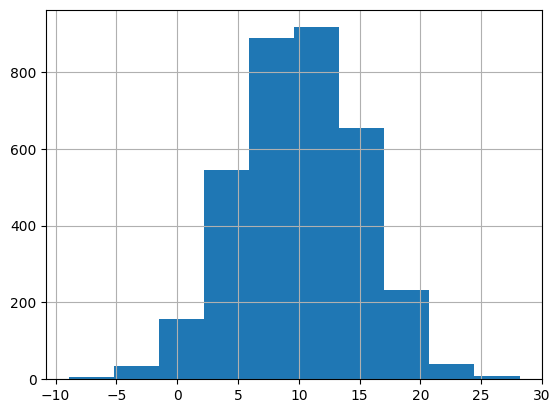

In [6]:
df.Vibration_mms.hist()
plt.show()

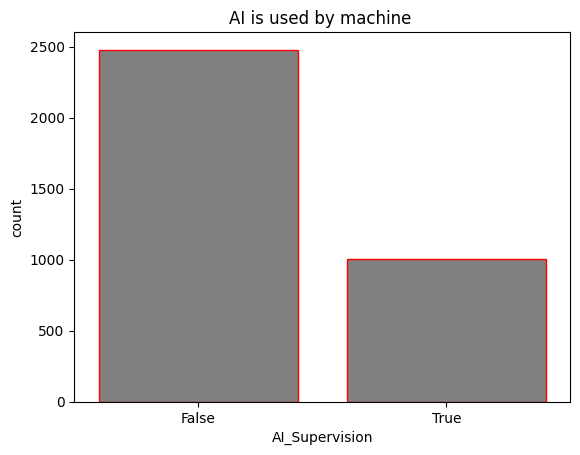

In [7]:
sns.countplot(x='AI_Supervision',data=df,color='grey',edgecolor='red')
plt.title('AI is used by machine ')
plt.xlabel('AI_Supervision')
plt.ylabel('count')
plt.show()

In [8]:
cols=['AI_Supervision','Failure_Within_7_Days']
l=LabelEncoder()

for col in cols:
    df[col]=l.fit_transform(df[col])

In [9]:
x=df.drop(columns=['Machine_ID','Remaining_Useful_Life_days','Failure_History_Count','Machine_Type','Failure_Within_7_Days'])
y=df['Failure_Within_7_Days']

In [10]:
x

,Installation_Year,Operational_Hours,Temperature_C,Vibration_mms,Sound_dB,Oil_Level_pct,Coolant_Level_pct,Power_Consumption_kW,Last_Maintenance_Days_Ago,Maintenance_History_Count,AI_Supervision,Error_Codes_Last_30_Days
0,2027,81769,73.43,12.78,83.72,36.76,68.74,84.95,153,4,1,3
1,2032,74966,58.32,14.99,77.04,100.00,62.13,154.61,136,5,1,4
2,2003,94006,49.63,23.78,69.08,42.96,35.96,51.90,258,1,1,6
3,2007,76637,63.73,12.38,85.58,94.90,48.94,75.61,43,4,0,4
4,2016,20870,42.77,4.42,96.72,47.56,53.78,224.93,346,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3479,2015,75745,56.65,7.87,89.18,75.09,68.08,185.97,20,4,0,0
3480,2038,35737,62.10,6.95,62.16,51.49,93.97,220.73,354,4,0,1
3481,2010,11028,78.30,14.72,65.52,77.06,65.49,151.77,98,10,1,3
3482,2028,75002,73.50,2.37,90.58,61.51,100.00,105.04,37,7,0,3


In [11]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
3479    0
3480    0
3481    0
3482    0
3483    0
Name: Failure_Within_7_Days, Length: 3484, dtype: int64


In [12]:
from imblearn.over_sampling import RandomOverSampler

In [13]:
osm=RandomOverSampler(random_state=42)
x_r,y_r=osm.fit_resample(x,y)
x_train,x_test,y_train,y_test=train_test_split(x_r,y_r,test_size=0.2,random_state=44)

In [14]:
y_r.value_counts()

Failure_Within_7_Days
0    3274
1    3274
Name: count, dtype: int64

In [15]:
k=5
knn=KNeighborsClassifier(n_neighbors=k)


In [16]:
knn.fit(x_r,y_r)


KNeighborsClassifier()

In [17]:
yb=knn.predict(x_test)

In [18]:
conf_matrix=confusion_matrix(y_test,yb)
print(conf_matrix)

[[647  22]
 [  0 641]]


In [19]:
y.value_counts()

Failure_Within_7_Days
0    3274
1     210
Name: count, dtype: int64

In [20]:
y_r.value_counts()

Failure_Within_7_Days
0    3274
1    3274
Name: count, dtype: int64

In [21]:
print(x.shape,x_train.shape,x_test.shape)

(3484, 12) (5238, 12) (1310, 12)


In [22]:
print(y.shape,y_train.shape,y_test.shape)

(3484,) (5238,) (1310,)


# knn model


In [23]:
k=5
knn=KNeighborsClassifier(n_neighbors=k)


In [24]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [25]:
y1_predict = knn.predict(x_test)

In [26]:
accuracy = accuracy_score(y_test,y1_predict)  
print(accuracy*100)

97.70992366412213


In [27]:
 c_report= classification_report(y_test,y1_predict)
print(c_report)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       669
           1       0.96      1.00      0.98       641

    accuracy                           0.98      1310
   macro avg       0.98      0.98      0.98      1310
weighted avg       0.98      0.98      0.98      1310



In [28]:
c1_report= confusion_matrix(y_test,y1_predict)
print(c1_report)

[[639  30]
 [  0 641]]


In [29]:
precision=precision_score(y_test,y1_predict)  
print(precision)

0.9552906110283159


In [30]:
recall=recall_score(y_test,y1_predict)    # TN/TN+FP
print(recall)

1.0


In [31]:
f1=f1_score(y_test,y1_predict)   #2(precision*recall)/(precision+recall)
print(f1)

0.9771341463414634


# grid searchCV for knn

In [32]:
pg={"n_neighbors":np.arange(1,30)}
gsm1=GridSearchCV(knn,param_grid=pg)
gsm1.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [33]:
yp=gsm1.predict(x_test)

In [34]:
c1_report= confusion_matrix(y_test,yp)
print(c1_report)

[[649  20]
 [  0 641]]


In [35]:
accuracy=accuracy_score(y_test,yp)
print(accuracy)

0.9847328244274809


In [36]:
c_report= classification_report(y_test,yp)
print(c_report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       669
           1       0.97      1.00      0.98       641

    accuracy                           0.98      1310
   macro avg       0.98      0.99      0.98      1310
weighted avg       0.99      0.98      0.98      1310



# naive bayes

In [37]:

from sklearn.naive_bayes import GaussianNB

In [38]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [39]:
y_predict=model.predict(x_test)

In [40]:
c_report= classification_report(y_test,y_predict)
print(c_report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       669
           1       0.93      0.99      0.96       641

    accuracy                           0.96      1310
   macro avg       0.96      0.96      0.96      1310
weighted avg       0.96      0.96      0.96      1310



In [41]:
c1=confusion_matrix(y_test,y_predict)
print(c1)

[[621  48]
 [  9 632]]


# grid search cv for navies bayes

In [42]:
par_G={'var_smoothing':[1e-9,1e-8,1e-7,1e-6,1e-5]}
gsm2=GridSearchCV(estimator=model,param_grid=par_G)
gsm2.fit(x_train,y_train)

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]})

In [43]:
yc=gsm2.predict(x_test)

In [44]:
accuracy=accuracy_score(y_test,yc)
print(accuracy)

0.9564885496183206


In [45]:
precision=confusion_matrix(y_test,yc)   
print(precision)

[[621  48]
 [  9 632]]


In [46]:
c_report= classification_report(y_test,yc)
print(c_report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       669
           1       0.93      0.99      0.96       641

    accuracy                           0.96      1310
   macro avg       0.96      0.96      0.96      1310
weighted avg       0.96      0.96      0.96      1310



# logisitic regression

In [47]:
lg=LogisticRegression()

In [48]:
lg.fit(x_train,y_train)

LogisticRegression()

In [49]:
lg_p=lg.predict(x_test)

In [50]:
lg_m=confusion_matrix(lg_p,y_test)
print(lg_m)

[[629  20]
 [ 40 621]]


In [51]:
lg_m1=accuracy_score(lg_p,y_test)
print(lg_m1)

0.9541984732824428


In [52]:
lg_m2=classification_report(lg_p,y_test)
print(lg_m2)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       649
           1       0.97      0.94      0.95       661

    accuracy                           0.95      1310
   macro avg       0.95      0.95      0.95      1310
weighted avg       0.95      0.95      0.95      1310



# grid searchcv for logisticregression

In [53]:
pg={"max_iter":[100,200]}
gsm3= GridSearchCV(lg,pg)
gsm3.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 200]})

In [54]:
yb1=gsm3.predict(x_test)

In [55]:
accuracy=accuracy_score(y_test,yb1)
print(accuracy)

0.9541984732824428


In [56]:
kp=confusion_matrix(y_test,yb1)
print(accuracy)

0.9541984732824428


In [57]:
classification=classification_report(y_test,yb1)
print(classification)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       669
           1       0.94      0.97      0.95       641

    accuracy                           0.95      1310
   macro avg       0.95      0.95      0.95      1310
weighted avg       0.95      0.95      0.95      1310



# decision tree

In [58]:
lg=DecisionTreeClassifier(random_state=0)

In [59]:
lg.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [60]:
y3=lg.predict(x_test)

In [61]:
y5=confusion_matrix(y_test,y3)
print(y5)

[[655  14]
 [  0 641]]


In [62]:
y6=accuracy_score(y_test,y3)
print(y6)

0.9893129770992366


In [63]:
y4=classification_report(y_test,y3)
print(y4)



              precision    recall  f1-score   support

           0       1.00      0.98      0.99       669
           1       0.98      1.00      0.99       641

    accuracy                           0.99      1310
   macro avg       0.99      0.99      0.99      1310
weighted avg       0.99      0.99      0.99      1310



In [64]:
cn=[str(cls)for cls in lg.classes_]

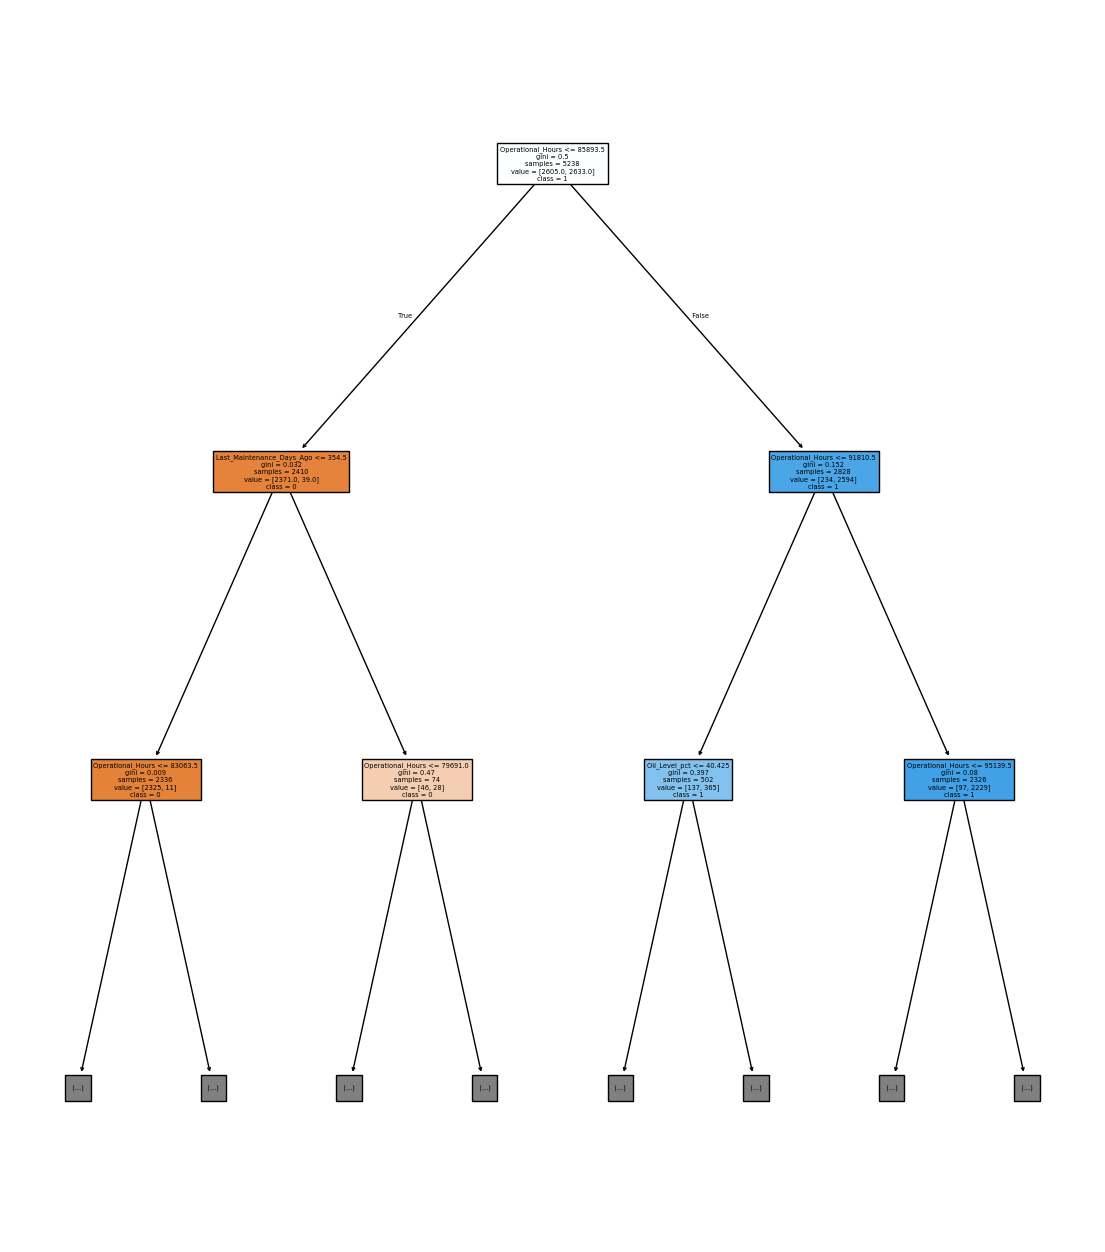

In [65]:
plt.figure(figsize=(14,16))
plot_tree(lg,filled=True,feature_names=x_train.columns,class_names=cn,max_depth=2)
plt.show()

# grid search cv for decisiontreeclassifier

In [66]:
pg={'criterion':['gini','entropy'],'max_depth':[None,10,20,30],'min_samples_split':[2,5],'min_samples_leaf':[1,2]}
gsm4=GridSearchCV(estimator=lg,param_grid=pg)
gsm4.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [67]:
yb2=gsm4.predict(x_test)

In [68]:
accuracy=accuracy_score(y_test,yb2)
print(accuracy)

0.9900763358778626


In [69]:
cm2=confusion_matrix(y_test,yb2)
print(cm2)

[[656  13]
 [  0 641]]


In [70]:
classification=classification_report(y_test,yb2)
print(classification)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       669
           1       0.98      1.00      0.99       641

    accuracy                           0.99      1310
   macro avg       0.99      0.99      0.99      1310
weighted avg       0.99      0.99      0.99      1310



# random forest

In [71]:
rf=RandomForestClassifier()

In [72]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [73]:
y2=rf.predict(x_test)

In [74]:
y4=confusion_matrix(y_test,y2)
print(y4)

[[655  14]
 [  0 641]]


In [75]:
y6=accuracy_score(y_test,y2)
print(y6)

0.9893129770992366


In [76]:
y8=classification_report(y_test,y2)
print(y8)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       669
           1       0.98      1.00      0.99       641

    accuracy                           0.99      1310
   macro avg       0.99      0.99      0.99      1310
weighted avg       0.99      0.99      0.99      1310



# grid search cv for random forest

In [77]:
pg={'criterion':['gini','entropy'],'max_depth':[None,10,20,30],'min_samples_split':[2,5],'min_samples_leaf':[1,2]}
pt=GridSearchCV(estimator=rf,param_grid=pg) 
pt.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [78]:
yb3=pt.predict(x_test)

In [79]:
accuracy=accuracy_score(y_test,yb3)
print(accuracy)

0.9908396946564886


In [80]:
matrix=confusion_matrix(y_test,yb3)
print(matrix)

[[657  12]
 [  0 641]]


In [81]:
classification=classification_report(y_test,yb3)
print(classification)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       669
           1       0.98      1.00      0.99       641

    accuracy                           0.99      1310
   macro avg       0.99      0.99      0.99      1310
weighted avg       0.99      0.99      0.99      1310



# SVC

In [82]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train,y_train)

SVC()

In [83]:
ds=classifier.predict(x_test)

In [84]:
accuracy=accuracy_score(y_test,ds)
print(accuracy)

0.9534351145038168


In [85]:
matrix=confusion_matrix(y_test,ds)
print(matrix)

[[617  52]
 [  9 632]]


In [86]:
classification=classification_report(y_test,ds)
print(classification)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       669
           1       0.92      0.99      0.95       641

    accuracy                           0.95      1310
   macro avg       0.95      0.95      0.95      1310
weighted avg       0.96      0.95      0.95      1310



# grid search cv for SVC 

In [87]:
pg = {'C':[0.1,1,10],'kernel':['linear']}
gsm5 = GridSearchCV(estimator=classifier,param_grid=pg,cv=5)
gsm5.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear']})

In [88]:
js=gsm5.predict(x_test)

In [89]:
accuracy=accuracy_score(y_test,js)
print(accuracy)

0.9534351145038168


In [90]:
matrix=confusion_matrix(y_test,js)
print(matrix)

[[619  50]
 [ 11 630]]


In [91]:
classification=classification_report(y_test,js)
print(classification)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       669
           1       0.93      0.98      0.95       641

    accuracy                           0.95      1310
   macro avg       0.95      0.95      0.95      1310
weighted avg       0.96      0.95      0.95      1310



# adaboosting classifier

In [92]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=55)

In [93]:
adbo.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=55)

In [94]:
re=adbo.predict(x_test)


In [95]:
accuracy=accuracy_score(y_test,re)
print(accuracy)

0.9893129770992366


In [96]:
cb=confusion_matrix(y_test,re)
print(cb)

[[655  14]
 [  0 641]]


In [97]:
report=classification_report(y_test,re)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       669
           1       0.98      1.00      0.99       641

    accuracy                           0.99      1310
   macro avg       0.99      0.99      0.99      1310
weighted avg       0.99      0.99      0.99      1310



# voting classifier

In [98]:
f1= LogisticRegression(max_iter=1000,random_state=0)
f2 = DecisionTreeClassifier(random_state=0)
f3= SVC(kernel='linear',random_state=0)
vcm=VotingClassifier(estimators=[('lr',f1),('dt',f2),('svm',f3)],voting='hard')
vcm.fit(x_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=0)),
                             ('dt', DecisionTreeClassifier(random_state=0)),
                             ('svm', SVC(kernel='linear', random_state=0))])

In [99]:
vc=vcm.predict(x_test)

In [100]:
accuracy=accuracy_score(y_test,vc)
print(accuracy)

0.9610687022900763


In [101]:
cb=confusion_matrix(y_test,vc)
print(cb)

[[629  40]
 [ 11 630]]


In [102]:
report=classification_report(y_test,vc)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       669
           1       0.94      0.98      0.96       641

    accuracy                           0.96      1310
   macro avg       0.96      0.96      0.96      1310
weighted avg       0.96      0.96      0.96      1310



# stacking classifier

In [106]:
a=RandomForestClassifier(n_estimators=10 ,random_state=0)
b=GradientBoostingClassifier(n_estimators=10,random_state=0)
c=SVC(kernel='rbf',random_state=42)
base_models=[('rf',a),('gb',b),('svc',c)]
#initialize meta classifier
meta_m=LogisticRegression(random_state=0)
scm=StackingClassifier(estimators=base_models,final_estimator=meta_m)
scm.fit(x_train,y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=0)),
                               ('gb',
                                GradientBoostingClassifier(n_estimators=10,
                                                           random_state=0)),
                               ('svc', SVC(random_state=42))],
                   final_estimator=LogisticRegression(random_state=0))

In [107]:
sc=scm.predict(x_test)


In [108]:
accuracy=accuracy_score(y_test,sc)
print(accuracy)

0.9916030534351145


In [109]:
cb=confusion_matrix(y_test,sc)
print(cb)

[[658  11]
 [  0 641]]


In [110]:
report=classification_report(y_test,sc)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       669
           1       0.98      1.00      0.99       641

    accuracy                           0.99      1310
   macro avg       0.99      0.99      0.99      1310
weighted avg       0.99      0.99      0.99      1310



# grading boosting classifer 

In [111]:
gbm=GradientBoostingClassifier(n_estimators=10,learning_rate=0.1,random_state=40)


In [112]:
gbm.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=10, random_state=40)

In [113]:
yo=gbm.predict(x_test)

In [115]:
accuracy=accuracy_score(y_test,yo)
print(accuracy)

0.9694656488549618


In [116]:
cv=confusion_matrix(y_predict,yo)
print(cv)

[[624   6]
 [ 15 665]]


In [117]:
c_report=classification_report(y_test,yo)
print(c_report)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       669
           1       0.95      0.99      0.97       641

    accuracy                           0.97      1310
   macro avg       0.97      0.97      0.97      1310
weighted avg       0.97      0.97      0.97      1310



# grid search for grading boosting classifer

In [118]:
pg={'n_estimators':[50,100,200],'learning_rate':[0.1,0.05,0.01],'max_depth':[3,4,5,]}
gsm8=GridSearchCV(estimator=gbm,param_grid=pg,cv=5)
gsm8.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(n_estimators=10,
                                                  random_state=40),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]})

In [119]:
ya=gsm8.predict(x_test)

In [121]:
accuracy=accuracy_score(y_test,ya)
print(accuracy)

0.9908396946564886


In [122]:
cv=confusion_matrix(y_predict,ya)
print(cv)

[[621   9]
 [ 36 644]]


In [123]:
c_report=classification_report(y_test,ya)
print(c_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       669
           1       0.98      1.00      0.99       641

    accuracy                           0.99      1310
   macro avg       0.99      0.99      0.99      1310
weighted avg       0.99      0.99      0.99      1310



# bagging classifier

In [124]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import BaggingClassifier
be=DecisionTreeClassifier(random_state=0)
bcm = BaggingClassifier(estimator=be,n_estimators=10)

In [125]:
bcm.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=0))

In [126]:
tr=bcm.predict(x_test)

In [127]:
accuracy=accuracy_score(y_test,tr)
print(accuracy)

0.9885496183206107


In [128]:
cv=confusion_matrix(y_predict,tr)
print(cv)

[[620  10]
 [ 34 646]]


In [129]:
c_report=classification_report(y_test,tr)
print(c_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       669
           1       0.98      1.00      0.99       641

    accuracy                           0.99      1310
   macro avg       0.99      0.99      0.99      1310
weighted avg       0.99      0.99      0.99      1310



In [138]:
data={
'Algorithms' : ['KNeighbors','Naive Bayes','Logistic Regression','Decision Tree','Random Forest','Support Vector Machine','Bagging','Gradient Boosting Machine','Voting Classifier'],
'Accuracy (%)': [98,96,95,99,99,95,99,97,96],
'Precision (%)': [96,93,97,98,98,92,98,95,94],
'Recall (%)': [100,99,94,100,100,99,100,99,98],
'F1 Score (%)': [98,96,95,99,99,95,99,97,96],}
data=pd.DataFrame(data)
print(data)

                  Algorithms  Accuracy (%)  Precision (%)  Recall (%)  \
0                 KNeighbors            98             96         100   
1                Naive Bayes            96             93          99   
2        Logistic Regression            95             97          94   
3              Decision Tree            99             98         100   
4              Random Forest            99             98         100   
5     Support Vector Machine            95             92          99   
6                    Bagging            99             98         100   
7  Gradient Boosting Machine            97             95          99   
8          Voting Classifier            96             94          98   

   F1 Score (%)  
0            98  
1            96  
2            95  
3            99  
4            99  
5            95  
6            99  
7            97  
8            96  


In [139]:
data1=data.melt(id_vars='Algorithms',var_name='Metric',value_name='Score')

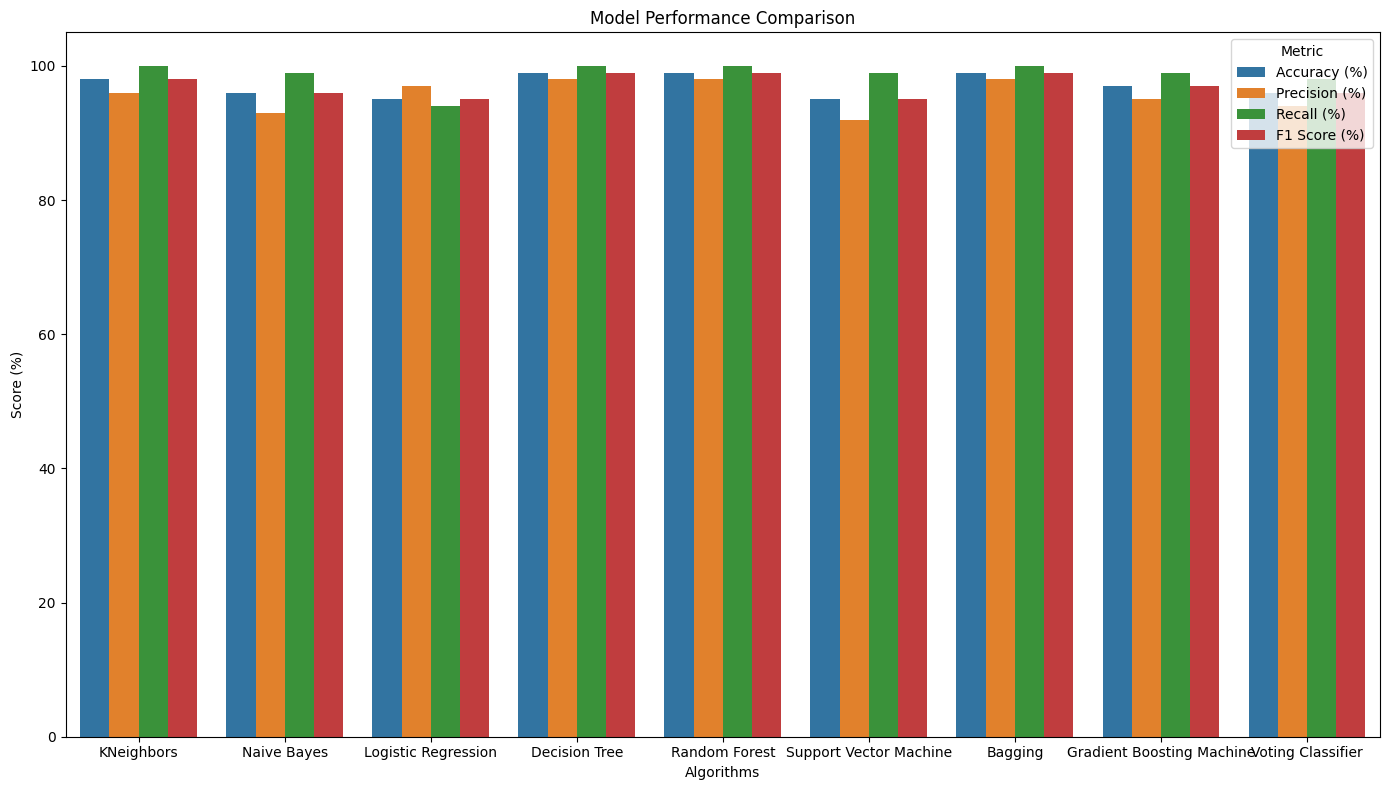

In [140]:
plt.figure(figsize=(14,8))
sns.barplot(data=data1,x='Algorithms',y='Score',hue='Metric')
plt.title('Model Performance Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Score (%)')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()